In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns

# Define settings
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 80)  # Set line wrapping width
plt.style.use('seaborn-darkgrid')  # Aesthetic visualizations

C:\Users\laiyu\AppData\Local\Temp\ipykernel_18280\2859466150.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Aesthetic visualizations


In [2]:
# Load the transaction data (Excel file)
transaction_data = pd.read_excel(f"QVI_transaction_data.xlsx", engine="openpyxl")

# Load the customer data (CSV file)
customer_data = pd.read_csv(f"QVI_purchase_behaviour.csv")

# Verify the data
print("Transaction Data Overview:")
print(transaction_data.head())

print("\nCustomer Data Overview:")
print(customer_data.head())

Transaction Data Overview:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Customer Data Overview:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003         

In [3]:
# Check data types of transaction data
print("Transaction Data Column Types:")
print(transaction_data.dtypes)

Transaction Data Column Types:
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [4]:
# Check data types of transaction data
print("Customer Data Column Types:")
print(customer_data.dtypes)

Customer Data Column Types:
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [5]:
# Convert DATE column from integer to date format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

# Verify the conversion
print("Updated DATE Column:")
print(transaction_data['DATE'].head())

Updated DATE Column:
0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


In [6]:
# Summary of PROD_NAME
print("Summary of PROD_NAME Column:")

# Unique product names
unique_products = transaction_data['PROD_NAME'].nunique()
print(f"Number of unique product names: {unique_products}")

# Sample of unique product names
print("\nSample of product names:")
print(transaction_data['PROD_NAME'].unique()[:10])  # Display first 10 unique product names

# Frequency distribution
product_counts = transaction_data['PROD_NAME'].value_counts()
print("\nTop 10 most frequent product names:")
print(product_counts.head(10))


Summary of PROD_NAME Column:
Number of unique product names: 114

Sample of product names:
['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G']

Top 10 most frequent product names:
PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Pota

Top 10 Most Common Words in Product Names:
      Word  Frequency
0     175g         26
1    Chips         21
2     150g         19
3        &         17
4   Smiths         16
5  Crinkle         14
6      Cut         14
7   Kettle         13
8     Salt         12
9   Cheese         12


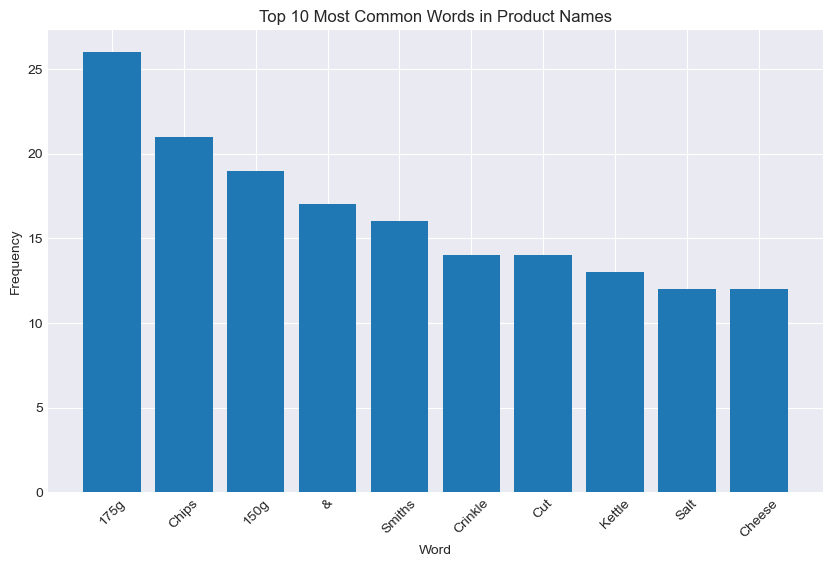

In [7]:
# Split product names into individual words
product_words = pd.Series(
    ' '.join(transaction_data['PROD_NAME'].unique()).split()
)

# Create a DataFrame for word counts
product_word_counts = product_words.value_counts().reset_index()
product_word_counts.columns = ['Word', 'Frequency']

# Display the top 10 most common words
print("Top 10 Most Common Words in Product Names:")
print(product_word_counts.head(10))

# Visualization


plt.figure(figsize=(10, 6))
plt.bar(product_word_counts['Word'][:10], product_word_counts['Frequency'][:10])
plt.title("Top 10 Most Common Words in Product Names")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()



Top 10 Most Common Cleaned Words in Product Names:
       Word  Frequency
0     Chips         21
1    Smiths         16
2   Crinkle         14
3       Cut         14
4    Kettle         13
5      Salt         12
6    Cheese         12
7  Original         10
8   Doritos          9
9      Chip          9


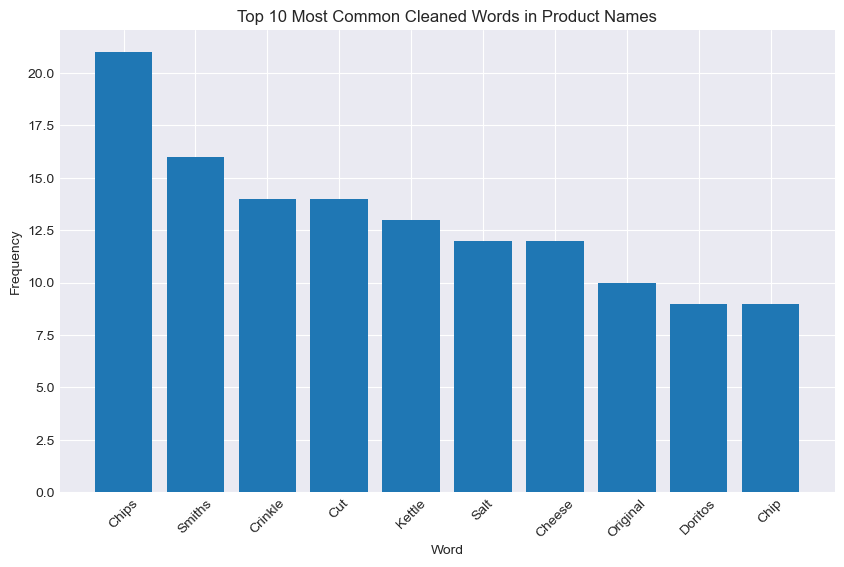

In [8]:
import re

# Split product names into individual words
product_words = pd.Series(
    ' '.join(transaction_data['PROD_NAME'].unique()).split()
)

# Remove words with digits or special characters using regex
cleaned_words = product_words[~product_words.str.contains(r'[0-9&@#$%^*()_+=<>?{}[\]|\\/:;~`]')]

# Count frequency of the cleaned words
cleaned_word_counts = cleaned_words.value_counts().reset_index()
cleaned_word_counts.columns = ['Word', 'Frequency']

# Sort by frequency
cleaned_word_counts = cleaned_word_counts.sort_values(by='Frequency', ascending=False)

# Display the top 10 most common cleaned words
print("Top 10 Most Common Cleaned Words in Product Names:")
print(cleaned_word_counts.head(10))

# Visualization

plt.figure(figsize=(10, 6))
plt.bar(cleaned_word_counts['Word'][:10], cleaned_word_counts['Frequency'][:10])
plt.title("Top 10 Most Common Cleaned Words in Product Names")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Add a column to identify salsa products
transaction_data['SALSA'] = transaction_data['PROD_NAME'].str.contains("salsa", case=False, na=False)

# Filter out rows with salsa products
transaction_data = transaction_data[transaction_data['SALSA'] == False]

# Drop the SALSA column as it's no longer needed
transaction_data = transaction_data.drop(columns=['SALSA'])

# Verify the removal
print("After removing salsa products, data overview:")
print(transaction_data['PROD_NAME'].head())


After removing salsa products, data overview:
0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object


In [10]:
# Check summary statistics for numerical columns
print("\nSummary statistics of numerical columns:")
print(transaction_data[['PROD_QTY', 'TOT_SALES']].describe())

# Check for nulls
print("\nNull values in each column:")
print(transaction_data.isnull().sum())

# Identify potential outliers for TOT_SALES (example of detecting outliers in total sales)
Q1 = transaction_data['TOT_SALES'].quantile(0.25)
Q3 = transaction_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

print("\nOutliers in TOT_SALES column (values outside 1.5*IQR):")
outliers = transaction_data[
    (transaction_data['TOT_SALES'] < (Q1 - 1.5 * IQR)) | (transaction_data['TOT_SALES'] > (Q3 + 1.5 * IQR))
]
print(outliers)



Summary statistics of numerical columns:
            PROD_QTY      TOT_SALES
count  246742.000000  246742.000000
mean        1.908062       7.321322
std         0.659831       3.077828
min         1.000000       1.700000
25%         2.000000       5.800000
50%         2.000000       7.400000
75%         2.000000       8.800000
max       200.000000     650.000000

Null values in each column:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Outliers in TOT_SALES column (values outside 1.5*IQR):
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
11     2018-08-20          8            8294    8221       114   
31     2019-05-15         43           43227   40186        26   
56     2019-05-16         74           74336  

In [11]:
# Filter the dataset for transactions where PROD_QTY is 200
outlier_transactions = transaction_data[transaction_data['PROD_QTY'] == 200]

# Display the transactions in question
print("Transactions with PROD_QTY of 200:")
print(outlier_transactions)

# Check if these transactions share any common characteristics
common_store = outlier_transactions['STORE_NBR'].value_counts()
common_customer = outlier_transactions['LYLTY_CARD_NBR'].value_counts()

print("\nStores with PROD_QTY of 200:")
print(common_store)

print("\nLoyalty cards with PROD_QTY of 200:")
print(common_customer)

Transactions with PROD_QTY of 200:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  

Stores with PROD_QTY of 200:
STORE_NBR
226    2
Name: count, dtype: int64

Loyalty cards with PROD_QTY of 200:
LYLTY_CARD_NBR
226000    2
Name: count, dtype: int64


In [12]:
# Identify the customer who bought 200 packets of chips
customer_id = outlier_transactions['LYLTY_CARD_NBR'].iloc[0]  # Extract the loyalty card number

# Filter dataset for all transactions by this customer
customer_transactions = transaction_data[transaction_data['LYLTY_CARD_NBR'] == customer_id]

# Display all transactions made by this customer
print(f"Transactions made by customer {customer_id}:")
print(customer_transactions)

# Summarize the customer's purchasing behavior
print("\nSummary of this customer's transactions:")
print(customer_transactions[['PROD_QTY', 'TOT_SALES']].describe())


Transactions made by customer 226000:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  

Summary of this customer's transactions:
       PROD_QTY  TOT_SALES
count       2.0        2.0
mean      200.0      650.0
std         0.0        0.0
min       200.0      650.0
25%       200.0      650.0
50%       200.0      650.0
75%       200.0      650.0
max       200.0      650.0


In [13]:
# Filter out the customer by their loyalty card number
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != customer_id]

# Verify that the customer has been removed
print(f"Transactions remaining after removing customer {customer_id}:")
print(transaction_data['LYLTY_CARD_NBR'].unique())  # Check if the loyalty card is still present
print("\nNumber of remaining transactions:", len(transaction_data))


Transactions remaining after removing customer 226000:
[  1000   1307   1343 ... 272358 272379 272380]

Number of remaining transactions: 246740


In [14]:
# Re-examine transaction data after filtering
print("Re-examined Transaction Data Summary:")

# Check the updated summary statistics
print("\nSummary statistics of numerical columns:")
print(transaction_data[['PROD_QTY', 'TOT_SALES']].describe())

# Check for any remaining null values
print("\nNull values in each column:")
print(transaction_data.isnull().sum())

# Verify the date column for consistency
print("\nDate column overview:")
print(transaction_data['DATE'].describe())

# Verify product names for unexpected entries
print("\nTop 10 products by frequency:")
print(transaction_data['PROD_NAME'].value_counts().head(10))

Re-examined Transaction Data Summary:

Summary statistics of numerical columns:
            PROD_QTY      TOT_SALES
count  246740.000000  246740.000000
mean        1.906456       7.316113
std         0.342499       2.474897
min         1.000000       1.700000
25%         2.000000       5.800000
50%         2.000000       7.400000
75%         2.000000       8.800000
max         5.000000      29.500000

Null values in each column:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Date column overview:
count                           246740
mean     2018-12-30 01:18:58.448569344
min                2018-07-01 00:00:00
25%                2018-09-30 00:00:00
50%                2018-12-30 00:00:00
75%                2019-03-31 00:00:00
max                2019-06-30 00:00:00
Name: DATE, dtype: object

Top 10 products by frequency:
PROD_NAME
Kettle Mozzarella   Basil & Pes

Transaction Counts by Date:
        DATE  Transaction_Count
0 2018-07-01                663
1 2018-07-02                650
2 2018-07-03                674
3 2018-07-04                669
4 2018-07-05                660
Number of days
364


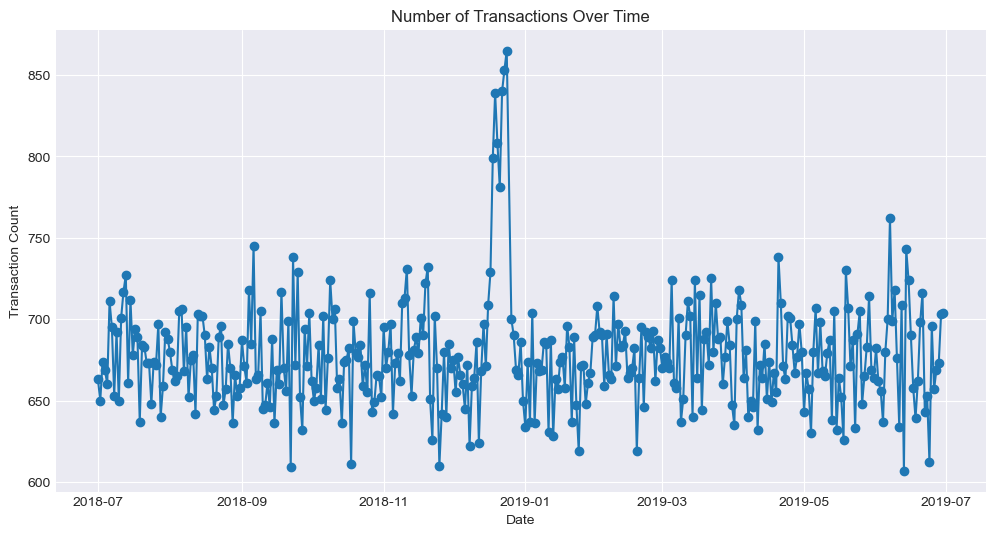

In [15]:
# Count the number of transactions by date
transaction_counts_by_date = transaction_data.groupby('DATE').size().reset_index(name='Transaction_Count')

# Display the summary
print("Transaction Counts by Date:")
print(transaction_counts_by_date.head())
print("Number of days")
print(len(transaction_counts_by_date))

# Plot the transaction counts over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(transaction_counts_by_date['DATE'], transaction_counts_by_date['Transaction_Count'], marker='o', linestyle='-')
plt.title("Number of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the full date range
date_range = pd.date_range(start="2018-07-01", end="2019-06-30")

# Convert the transaction data into a DataFrame with all dates
transactions_full = pd.DataFrame(date_range, columns=['DATE'])

# Merge with the transaction counts by date
transaction_counts_by_date = transaction_data.groupby('DATE').size().reset_index(name='Transaction_Count')
transactions_full = transactions_full.merge(transaction_counts_by_date, on='DATE', how='left')

# Fill missing transaction counts with 0
transactions_full['Transaction_Count'] = transactions_full['Transaction_Count'].fillna(0)

# Identify missing dates
missing_dates = transactions_full[transactions_full['Transaction_Count'] == 0]
print("Missing Dates:")
print(missing_dates)


Missing Dates:
          DATE  Transaction_Count
177 2018-12-25                0.0


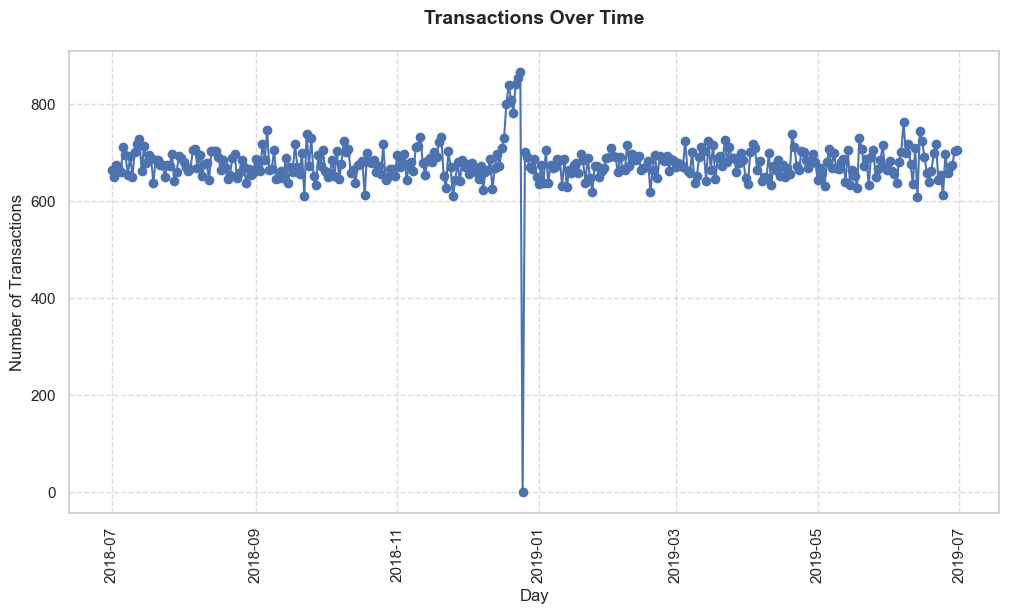

In [17]:
# Set plot style
sns.set_theme(style="whitegrid")
# Plot all transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_full['DATE'], transactions_full['Transaction_Count'], marker='o', linestyle='-')
plt.title("Transactions Over Time", fontsize=14, weight='bold', pad=20)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


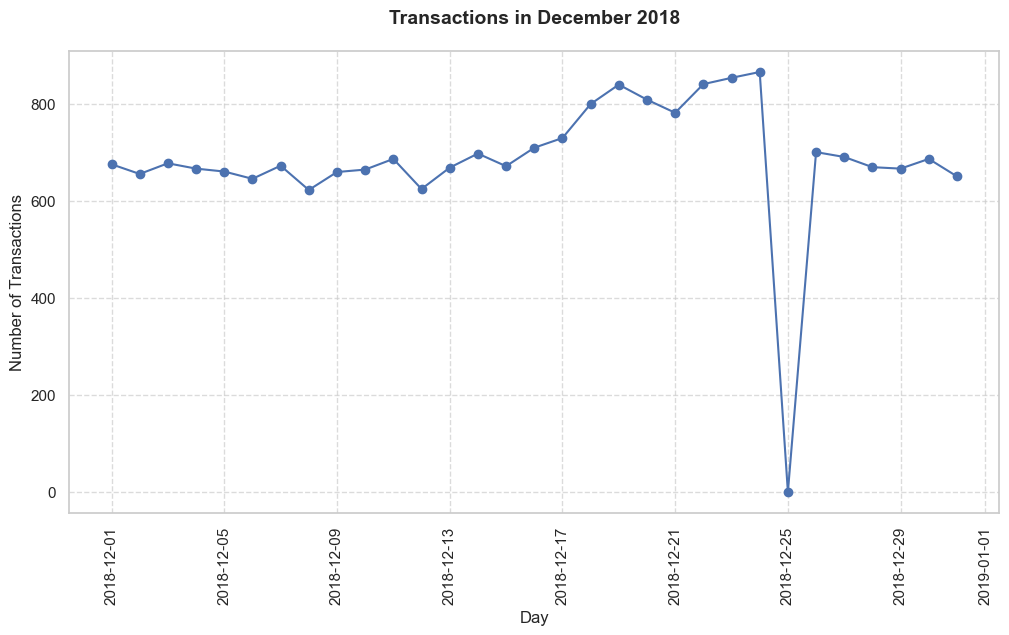

In [18]:
# Filter data for December 2018
december_data = transactions_full[
    (transactions_full['DATE'] >= "2018-12-01") & (transactions_full['DATE'] <= "2018-12-31")
]

# Plot transactions in December
plt.figure(figsize=(12, 6))
plt.plot(december_data['DATE'], december_data['Transaction_Count'], marker='o', linestyle='-')
plt.title("Transactions in December 2018", fontsize=14, weight='bold', pad=20)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [19]:
# Extract numerical values (pack size) from PROD_NAME
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(int)

# Count the number of transactions for each pack size
pack_size_summary = transaction_data.groupby('PACK_SIZE').size().reset_index(name='Transaction_Count')

# Sort the results by PACK_SIZE
pack_size_summary = pack_size_summary.sort_values(by='PACK_SIZE')

# Display the summary
print("\nPack Size Summary:")
print(pack_size_summary)


Pack Size Summary:
    PACK_SIZE  Transaction_Count
0          70               1507
1          90               3008
2         110              22387
3         125               1454
4         134              25102
5         135               3257
6         150              40203
7         160               2970
8         165              15297
9         170              19983
10        175              66390
11        180               1468
12        190               2995
13        200               4473
14        210               6272
15        220               1564
16        250               3169
17        270               6285
18        330              12540
19        380               6416


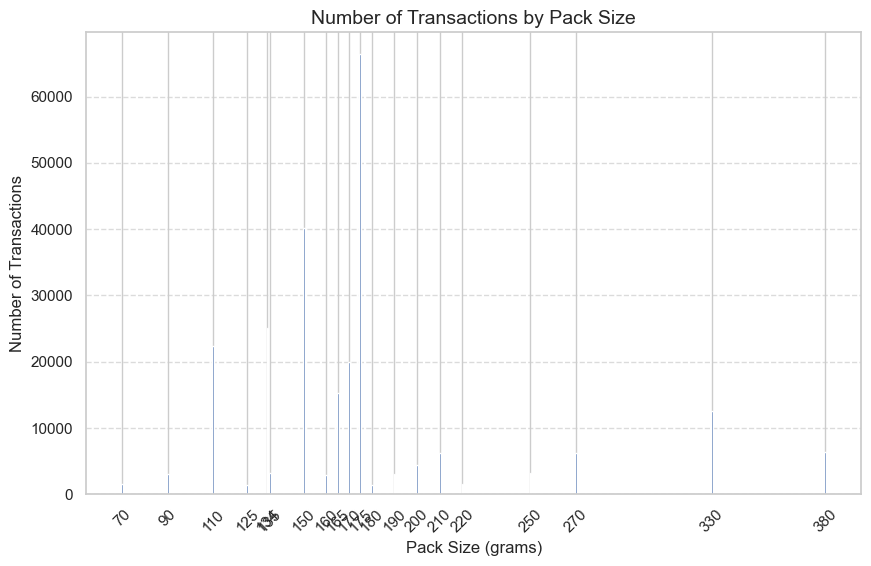

In [20]:

# Group transactions by pack size
pack_size_summary = transaction_data.groupby('PACK_SIZE').size().reset_index(name='Transaction_Count')

# Sort by pack size
pack_size_summary = pack_size_summary.sort_values(by='PACK_SIZE')


# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(pack_size_summary['PACK_SIZE'], pack_size_summary['Transaction_Count'])
plt.title("Number of Transactions by Pack Size", fontsize=14)
plt.xlabel("Pack Size (grams)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(pack_size_summary['PACK_SIZE'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Unique Brands Extracted:
['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger']

Top 10 Brands by Transaction Count:
       BRAND  Transaction_Count
0     Kettle              41288
1     Smiths              27390
2   Pringles              25102
3    Doritos              22041
4      Thins              14075
5        RRD              11894
6  Infuzions              11057
7         WW              10320
8       Cobs               9693
9   Tostitos               9471


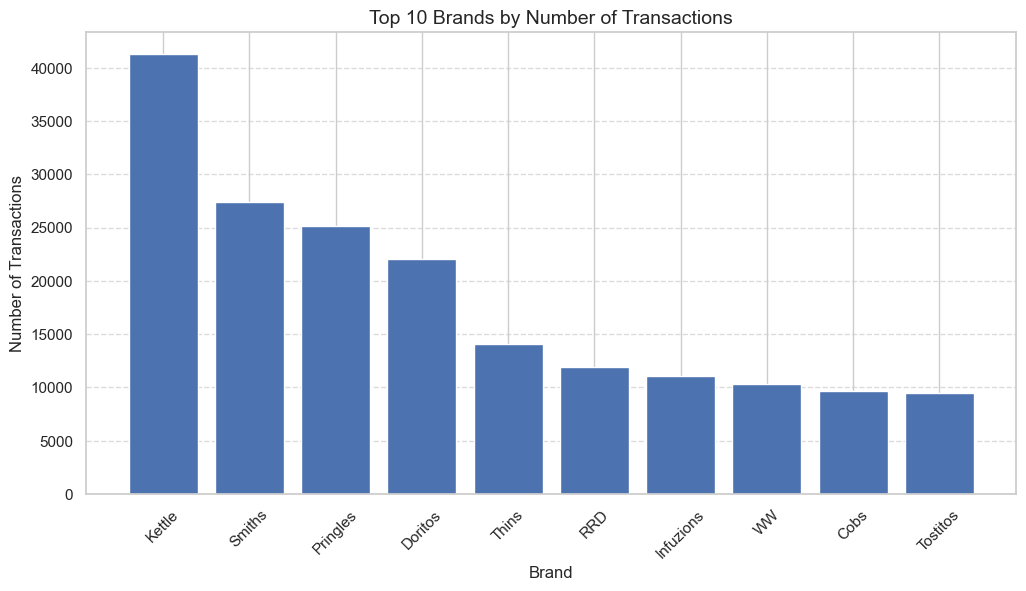

In [21]:
# Extract the first word from PROD_NAME as the brand name
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Verify the results
print("Unique Brands Extracted:")
print(transaction_data['BRAND'].unique()[:10])  # Display the first 10 unique brands

# Count the number of transactions for each brand
brand_summary = transaction_data['BRAND'].value_counts().reset_index()
brand_summary.columns = ['BRAND', 'Transaction_Count']

# Display the top 10 brands
print("\nTop 10 Brands by Transaction Count:")
print(brand_summary.head(10))

# Optional: Plot the top brands

plt.figure(figsize=(12, 6))
plt.bar(brand_summary['BRAND'][:10], brand_summary['Transaction_Count'][:10])
plt.title("Top 10 Brands by Number of Transactions", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [22]:
# Replace specific brand names
transaction_data['BRAND'] = transaction_data['BRAND'].replace({
    'Natural': 'NCC',
    'Smith': 'Smiths',
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'Grain': 'GrnWves',
    'Red': 'RRD',
    'WW': 'Woolworths',
    'Snbts': 'Sunbites',
})

# Verify the replacements
print("Updated Brand Names After Cleaning:")
print(transaction_data['BRAND'].unique())


Updated Brand Names After Cleaning:
['NCC' 'CCs' 'Smiths' 'Kettle' 'GrnWves' 'Doritos' 'Twisties' 'Woolworths'
 'Thins' 'Burger' 'Cheezels' 'Infuzions' 'RRD' 'Pringles' 'Tyrrells'
 'Cobs' 'French' 'Tostitos' 'Cheetos' 'Sunbites']



Top 10 Brands by Transaction Count After Cleaning:
        BRAND  Transaction_Count
0      Kettle              41288
1      Smiths              30353
2     Doritos              25224
3    Pringles              25102
4         RRD              16321
5   Infuzions              14201
6       Thins              14075
7  Woolworths              11836
8        Cobs               9693
9    Tostitos               9471


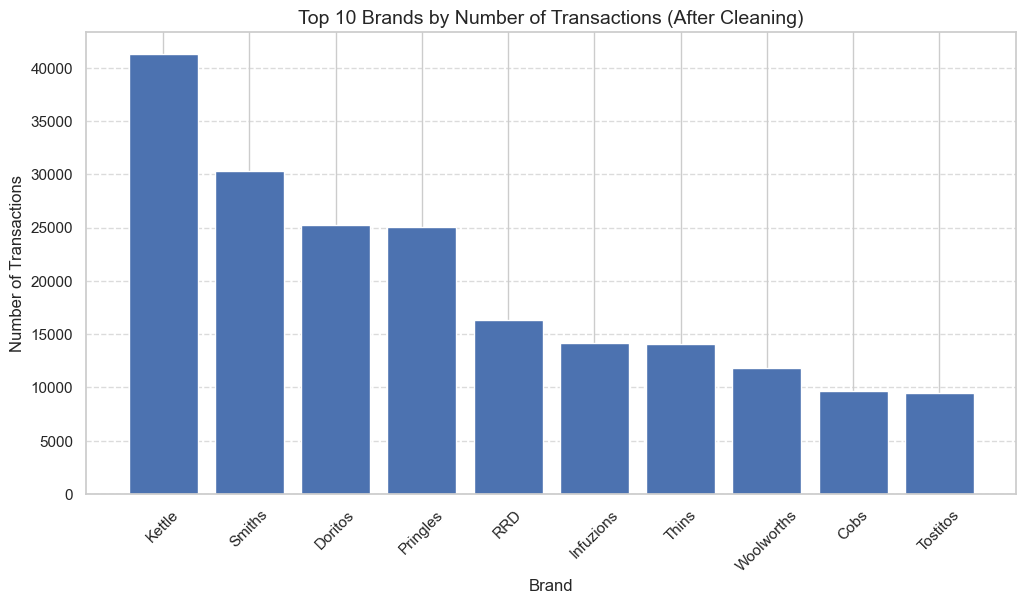

In [23]:
# Summarize the number of transactions for each brand
brand_summary = transaction_data['BRAND'].value_counts().reset_index()
brand_summary.columns = ['BRAND', 'Transaction_Count']

# Display the top 10 brands
print("\nTop 10 Brands by Transaction Count After Cleaning:")
print(brand_summary.head(10))


# Plot the top 10 brands
plt.figure(figsize=(12, 6))
plt.bar(brand_summary['BRAND'][:10], brand_summary['Transaction_Count'][:10])
plt.title("Top 10 Brands by Number of Transactions (After Cleaning)", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
# Display basic information about the dataset
print("Customer Data Overview:")
print(customer_data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(customer_data.describe())

# Display a few sample rows
print("\nSample Rows from Customer Data:")
print(customer_data.head())


Customer Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Summary Statistics:
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06

Sample Rows from Customer Data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/CO

In [25]:
# Check for null values in the dataset
print("\nMissing Values in Customer Data:")
print(customer_data.isnull().sum())



Missing Values in Customer Data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [26]:
# Check distribution of LIFESTAGE
print("\nLIFESTAGE Distribution:")
print(customer_data['LIFESTAGE'].value_counts())

# Check distribution of PREMIUM_CUSTOMER
print("\nPREMIUM_CUSTOMER Distribution:")
print(customer_data['PREMIUM_CUSTOMER'].value_counts())




LIFESTAGE Distribution:
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

PREMIUM_CUSTOMER Distribution:
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


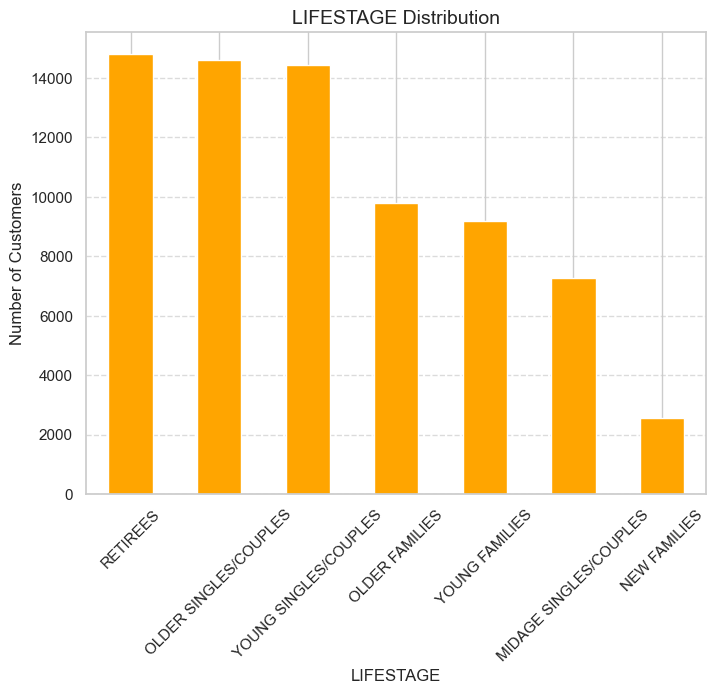

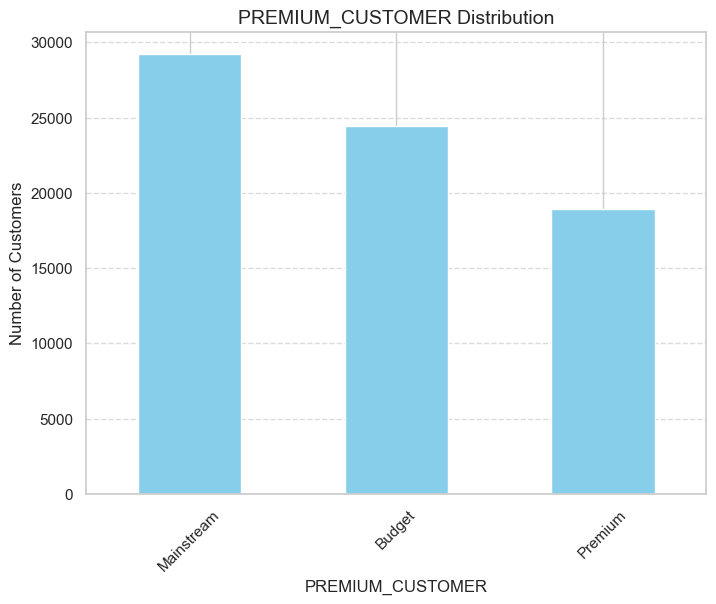

In [27]:
# Plot LIFESTAGE distribution
plt.figure(figsize=(8, 6))
customer_data['LIFESTAGE'].value_counts().plot(kind='bar', color='orange')
plt.title("LIFESTAGE Distribution", fontsize=14)
plt.xlabel("LIFESTAGE", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot PREMIUM_CUSTOMER distribution
plt.figure(figsize=(8, 6))
customer_data['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', color='skyblue')
plt.title("PREMIUM_CUSTOMER Distribution", fontsize=14)
plt.xlabel("PREMIUM_CUSTOMER", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [28]:
# Perform a left join to merge transaction and customer data
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

# Check the number of rows to ensure no duplicates were created
print("Number of rows in merged data:", len(data))
print("Number of rows in transaction data:", len(transaction_data))


Number of rows in merged data: 246740
Number of rows in transaction data: 246740


In [29]:
# Check for transactions with unmatched customers (null values in LIFESTAGE or PREMIUM_CUSTOMER)
missing_customers = data[data['LIFESTAGE'].isnull() | data['PREMIUM_CUSTOMER'].isnull()]

# Display unmatched transactions
print("\nTransactions with Missing Customer Details:")
print(missing_customers)

# Count the number of unmatched transactions
print("\nNumber of unmatched transactions:", len(missing_customers))



Transactions with Missing Customer Details:
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []

Number of unmatched transactions: 0


In [30]:
# Save the merged dataset to a CSV file
data.to_csv(f"QVI_data.csv", index=False)

print(f"Dataset saved successfully at QVI_data.csv")

Dataset saved successfully at QVI_data.csv


In [31]:
# Reload the saved dataset to verify
saved_data = pd.read_csv(f"QVI_data.csv")
print(saved_data.head())


         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  2018-10-17          1            1000       1         5   
1  2019-05-14          1            1307     348        66   
2  2019-05-20          1            1343     383        61   
3  2018-08-17          2            2373     974        69   
4  2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0        175   
1                  CCs Nacho Cheese    175g         3        6.3        175   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9        170   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0        175   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8        150   

    BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0     NCC   YOUNG SINGLES/COUPLES          Premium  
1     CCs  MIDAGE SINGLES/COUPLES           Bu

## Data analysis on customer

#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

Total Sales by LIFESTAGE and PREMIUM_CUSTOMER:
                 LIFESTAGE PREMIUM_CUSTOMER  Total_Sales
6           OLDER FAMILIES           Budget    156863.75
19   YOUNG SINGLES/COUPLES       Mainstream    147582.20
13                RETIREES       Mainstream    145168.95
15          YOUNG FAMILIES           Budget    129717.95
9    OLDER SINGLES/COUPLES           Budget    127833.60
10   OLDER SINGLES/COUPLES       Mainstream    124648.50
11   OLDER SINGLES/COUPLES          Premium    123537.55
12                RETIREES           Budget    105916.30
7           OLDER FAMILIES       Mainstream     96413.55
14                RETIREES          Premium     91296.65
16          YOUNG FAMILIES       Mainstream     86338.25
1   MIDAGE SINGLES/COUPLES       Mainstream     84734.25
17          YOUNG FAMILIES          Premium     78571.70
8           OLDER FAMILIES          Premium     75242.60
18   YOUNG SINGLES/COUPLES           Budget     57122.10
2   MIDAGE SINGLES/COUPLES          Premi

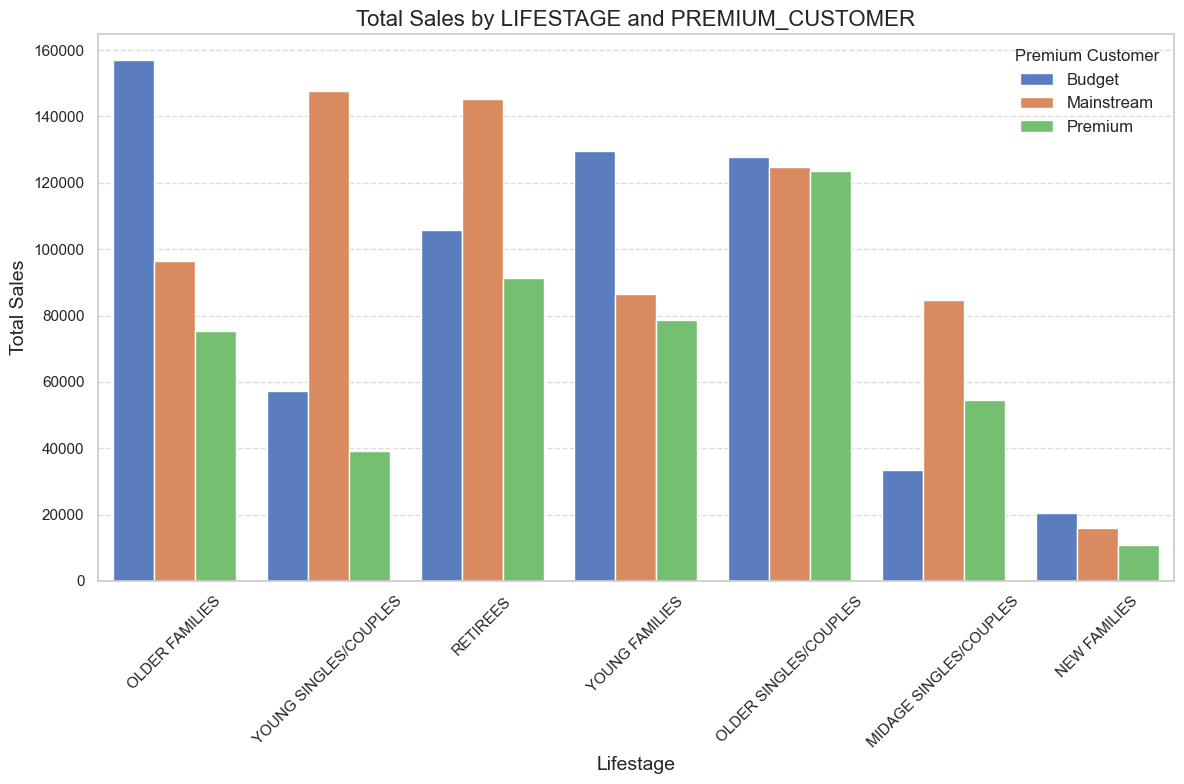

In [32]:
# Group data by LIFESTAGE and PREMIUM_CUSTOMER and calculate total sales
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Rename columns for clarity
sales_by_segment.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'Total_Sales']

# Sort the results for better visualization
sales_by_segment = sales_by_segment.sort_values(by='Total_Sales', ascending=False)

# Display the summary
print("Total Sales by LIFESTAGE and PREMIUM_CUSTOMER:")
print(sales_by_segment)


# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=sales_by_segment,
    x='LIFESTAGE',
    y='Total_Sales',
    hue='PREMIUM_CUSTOMER',
    palette='muted'
)

# Add titles and labels
plt.title("Total Sales by LIFESTAGE and PREMIUM_CUSTOMER", fontsize=16)
plt.xlabel("Lifestage", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Premium Customer", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [33]:
# Group data by LIFESTAGE and PREMIUM_CUSTOMER and count unique customers
customer_count_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Rename columns for clarity
customer_count_by_segment.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'Customer_Count']

# Sort for better visualization
customer_count_by_segment = customer_count_by_segment.sort_values(by='Customer_Count', ascending=False)

# Display the summary
print("Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER:")
print(customer_count_by_segment)


Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER:
                 LIFESTAGE PREMIUM_CUSTOMER  Customer_Count
19   YOUNG SINGLES/COUPLES       Mainstream            7917
13                RETIREES       Mainstream            6358
10   OLDER SINGLES/COUPLES       Mainstream            4858
9    OLDER SINGLES/COUPLES           Budget            4849
11   OLDER SINGLES/COUPLES          Premium            4682
6           OLDER FAMILIES           Budget            4611
12                RETIREES           Budget            4385
15          YOUNG FAMILIES           Budget            3953
14                RETIREES          Premium            3812
18   YOUNG SINGLES/COUPLES           Budget            3647
1   MIDAGE SINGLES/COUPLES       Mainstream            3298
7           OLDER FAMILIES       Mainstream            2788
16          YOUNG FAMILIES       Mainstream            2685
20   YOUNG SINGLES/COUPLES          Premium            2480
17          YOUNG FAMILIES          Premium  

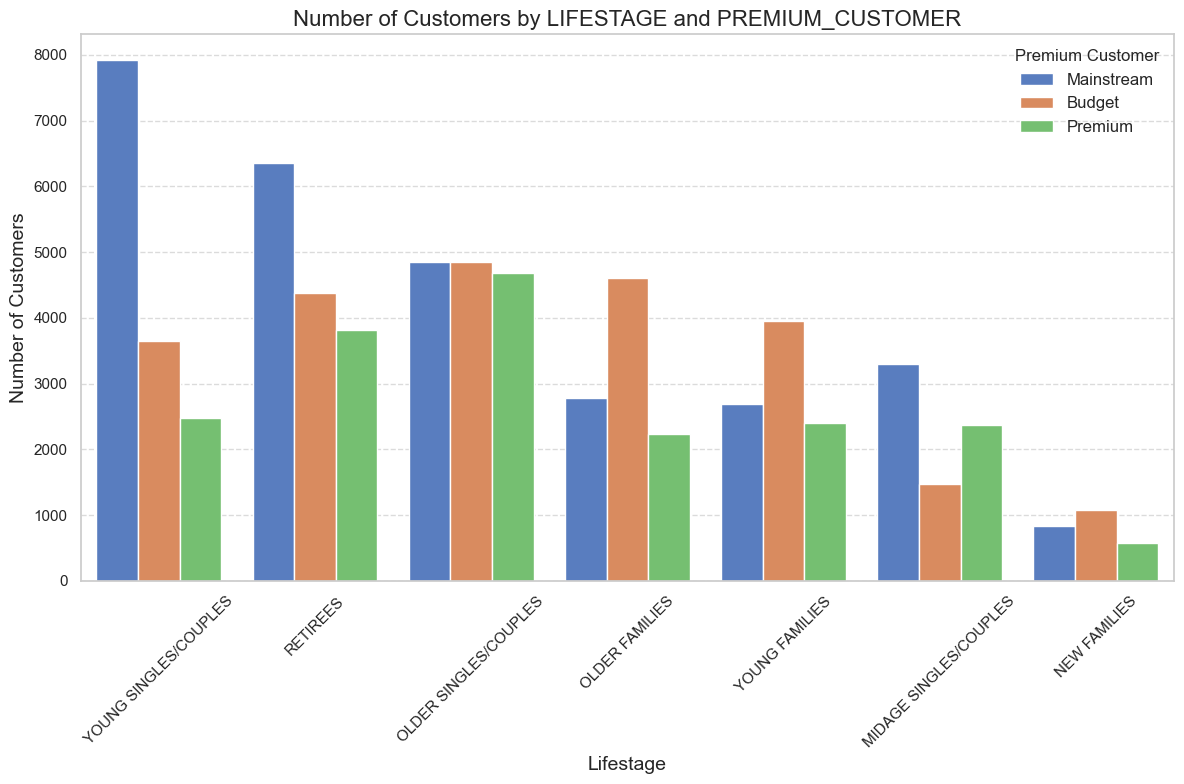

In [34]:
# Plot the number of customers by segment
plt.figure(figsize=(12, 8))
sns.barplot(
    data=customer_count_by_segment,
    x='LIFESTAGE',
    y='Customer_Count',
    hue='PREMIUM_CUSTOMER',
    palette='muted'
)

# Add titles and labels
plt.title("Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER", fontsize=16)
plt.xlabel("Lifestage", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Premium Customer", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [35]:
# Calculate total units and unique customer count per segment
units_and_customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    Total_Units=('PROD_QTY', 'sum'),
    Customer_Count=('LYLTY_CARD_NBR', 'nunique')
).reset_index()

# Calculate average units per customer
units_and_customers['Avg_Units_Per_Customer'] = units_and_customers['Total_Units'] / units_and_customers['Customer_Count']

# Sort the results for better visualization
units_and_customers = units_and_customers.sort_values(by='Avg_Units_Per_Customer', ascending=False)

# Display the summary
print("Average Units Per Customer by LIFESTAGE and PREMIUM_CUSTOMER:")
print(units_and_customers[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'Avg_Units_Per_Customer']])


Average Units Per Customer by LIFESTAGE and PREMIUM_CUSTOMER:
                 LIFESTAGE PREMIUM_CUSTOMER  Avg_Units_Per_Customer
7           OLDER FAMILIES       Mainstream                9.255380
6           OLDER FAMILIES           Budget                9.076773
8           OLDER FAMILIES          Premium                9.071717
15          YOUNG FAMILIES           Budget                8.722995
17          YOUNG FAMILIES          Premium                8.716013
16          YOUNG FAMILIES       Mainstream                8.638361
9    OLDER SINGLES/COUPLES           Budget                6.781398
11   OLDER SINGLES/COUPLES          Premium                6.769543
10   OLDER SINGLES/COUPLES       Mainstream                6.712021
1   MIDAGE SINGLES/COUPLES       Mainstream                6.432080
12                RETIREES           Budget                6.141847
14                RETIREES          Premium                6.103358
2   MIDAGE SINGLES/COUPLES          Premium           

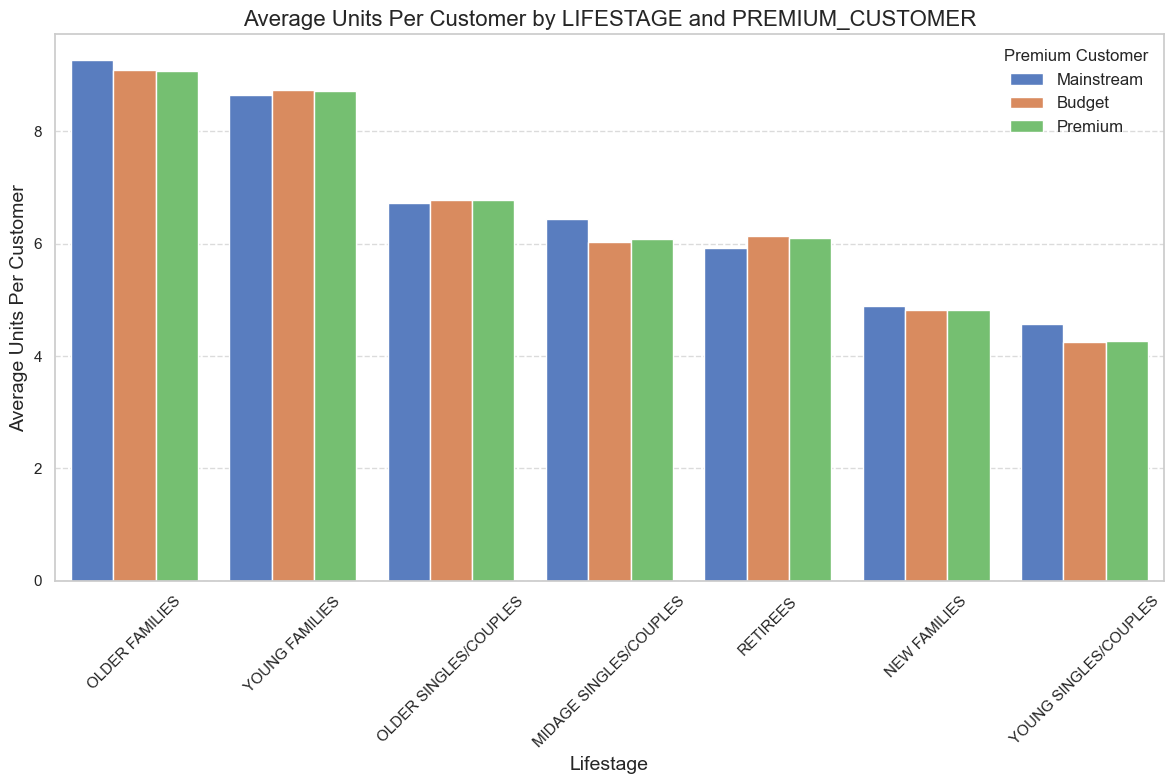

In [36]:
# Plot the average units per customer by segment
plt.figure(figsize=(12, 8))
sns.barplot(
    data=units_and_customers,
    x='LIFESTAGE',
    y='Avg_Units_Per_Customer',
    hue='PREMIUM_CUSTOMER',
    palette='muted'
)

# Add titles and labels
plt.title("Average Units Per Customer by LIFESTAGE and PREMIUM_CUSTOMER", fontsize=16)
plt.xlabel("Lifestage", fontsize=14)
plt.ylabel("Average Units Per Customer", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Premium Customer", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [37]:
# Calculate total sales and total units per segment
sales_and_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    Total_Sales=('TOT_SALES', 'sum'),
    Total_Units=('PROD_QTY', 'sum')
).reset_index()

# Calculate average price per unit
sales_and_units['Avg_Price_Per_Unit'] = sales_and_units['Total_Sales'] / sales_and_units['Total_Units']

# Sort the results for better visualization
sales_and_units = sales_and_units.sort_values(by='Avg_Price_Per_Unit', ascending=False)

# Display the summary
print("Average Price Per Unit by LIFESTAGE and PREMIUM_CUSTOMER:")
print(sales_and_units[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'Avg_Price_Per_Unit']])


Average Price Per Unit by LIFESTAGE and PREMIUM_CUSTOMER:
                 LIFESTAGE PREMIUM_CUSTOMER  Avg_Price_Per_Unit
19   YOUNG SINGLES/COUPLES       Mainstream            4.074043
1   MIDAGE SINGLES/COUPLES       Mainstream            3.994449
4             NEW FAMILIES       Mainstream            3.935887
12                RETIREES           Budget            3.932731
3             NEW FAMILIES           Budget            3.931969
14                RETIREES          Premium            3.924037
11   OLDER SINGLES/COUPLES          Premium            3.897698
9    OLDER SINGLES/COUPLES           Budget            3.887529
5             NEW FAMILIES          Premium            3.886168
13                RETIREES       Mainstream            3.852986
10   OLDER SINGLES/COUPLES       Mainstream            3.822753
2   MIDAGE SINGLES/COUPLES          Premium            3.780823
15          YOUNG FAMILIES           Budget            3.761903
17          YOUNG FAMILIES          Premium   

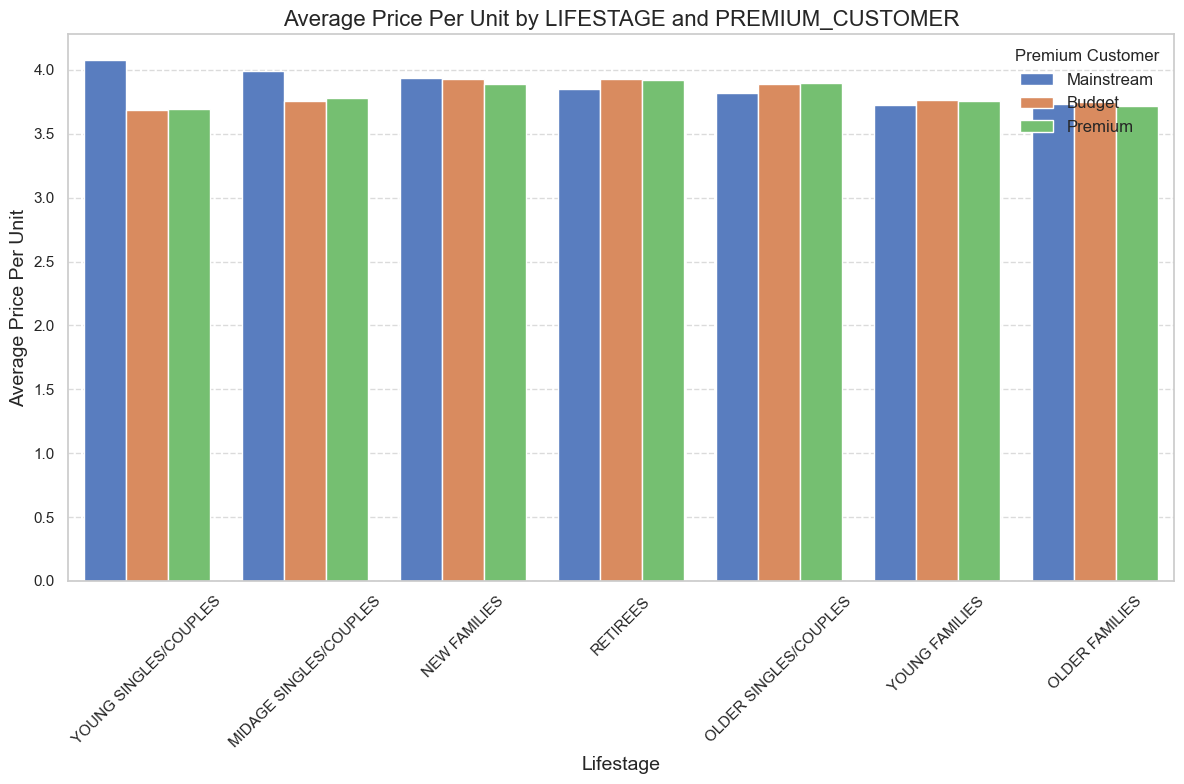

In [38]:
# Plot the average price per unit by segment
plt.figure(figsize=(12, 8))
sns.barplot(
    data=sales_and_units,
    x='LIFESTAGE',
    y='Avg_Price_Per_Unit',
    hue='PREMIUM_CUSTOMER',
    palette='muted'
)

# Add titles and labels
plt.title("Average Price Per Unit by LIFESTAGE and PREMIUM_CUSTOMER", fontsize=16)
plt.xlabel("Lifestage", fontsize=14)
plt.ylabel("Average Price Per Unit", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Premium Customer", fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [39]:
from scipy.stats import ttest_ind

# Filter data for midage segment
midage_data = data[data['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']

# Split into mainstream and other groups
mainstream_prices = midage_data[midage_data['PREMIUM_CUSTOMER'] == 'Mainstream']['TOT_SALES'] / \
                    midage_data[midage_data['PREMIUM_CUSTOMER'] == 'Mainstream']['PROD_QTY']

other_prices = midage_data[midage_data['PREMIUM_CUSTOMER'] != 'Mainstream']['TOT_SALES'] / \
               midage_data[midage_data['PREMIUM_CUSTOMER'] != 'Mainstream']['PROD_QTY']


#### Perform an independent t-test between mainstream vs premium and budget midage

In [40]:
# Perform the t-test
t_stat, p_value = ttest_ind(mainstream_prices.dropna(), other_prices.dropna(), equal_var=False)

# Print the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The difference in average price per unit is statistically significant.")
else:
    print("The difference in average price per unit is not statistically significant.")


T-Statistic: 16.864135225719995
P-Value: 1.9622867289480684e-63
The difference in average price per unit is statistically significant.


#### young singles and couples

In [41]:
from scipy.stats import ttest_ind

# Filter data for young singles/couples in mainstream and premium/budget segments
mainstream_young = data[
    (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

premium_budget_young = data[
    (data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (data['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium']))
]

# Extract unit prices
mainstream_young_unit_prices = mainstream_young['TOT_SALES'] / mainstream_young['PROD_QTY']
premium_budget_young_unit_prices = premium_budget_young['TOT_SALES'] / premium_budget_young['PROD_QTY']


In [42]:
# Perform an independent t-test
t_stat, p_value = ttest_ind(mainstream_young_unit_prices, premium_budget_young_unit_prices, equal_var=False)

# Display the results
print("T-Statistic (Young Singles/Couples):", t_stat)
print("P-Value (Young Singles/Couples):", p_value)

# Interpretation
if p_value < 0.05:
    print("The difference in average price per unit is statistically significant for Young Singles/Couples.")
else:
    print("The difference in average price per unit is not statistically significant for Young Singles/Couples.")


T-Statistic (Young Singles/Couples): 34.835076793113934
P-Value (Young Singles/Couples): 1.4785522394934493e-260
The difference in average price per unit is statistically significant for Young Singles/Couples.


#### Deep dive into Mainstream, young singles/couples

In [43]:
# Filter for Mainstream Young Singles/Couples
mainstream_young = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Calculate brand preference
brand_preference = mainstream_young['BRAND'].value_counts(normalize=True) * 100  # As percentages

# Compare with other segments
other_segments = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] != 'Mainstream')]
brand_preference_others = other_segments['BRAND'].value_counts(normalize=True) * 100

# Combine results for comparison
brand_comparison = pd.DataFrame({
    'Mainstream Young Singles/Couples': brand_preference,
    'Other Segments': brand_preference_others
}).fillna(0)

# Display the top brand preferences
print("Brand Preference Comparison:")
print(brand_comparison.head(10))


Brand Preference Comparison:
           Mainstream Young Singles/Couples  Other Segments
BRAND                                                      
Burger                             0.317233        0.804159
CCs                                1.135898        2.578856
Cheetos                            0.849366        1.372617
Cheezels                           1.770364        1.857886
Cobs                               4.420794        3.688042
Doritos                           12.172534        8.811092
French                             0.399099        0.804159
GrnWves                            3.305362        2.980936
Infuzions                          6.395825        5.289428
Kettle                            19.668440       14.204506


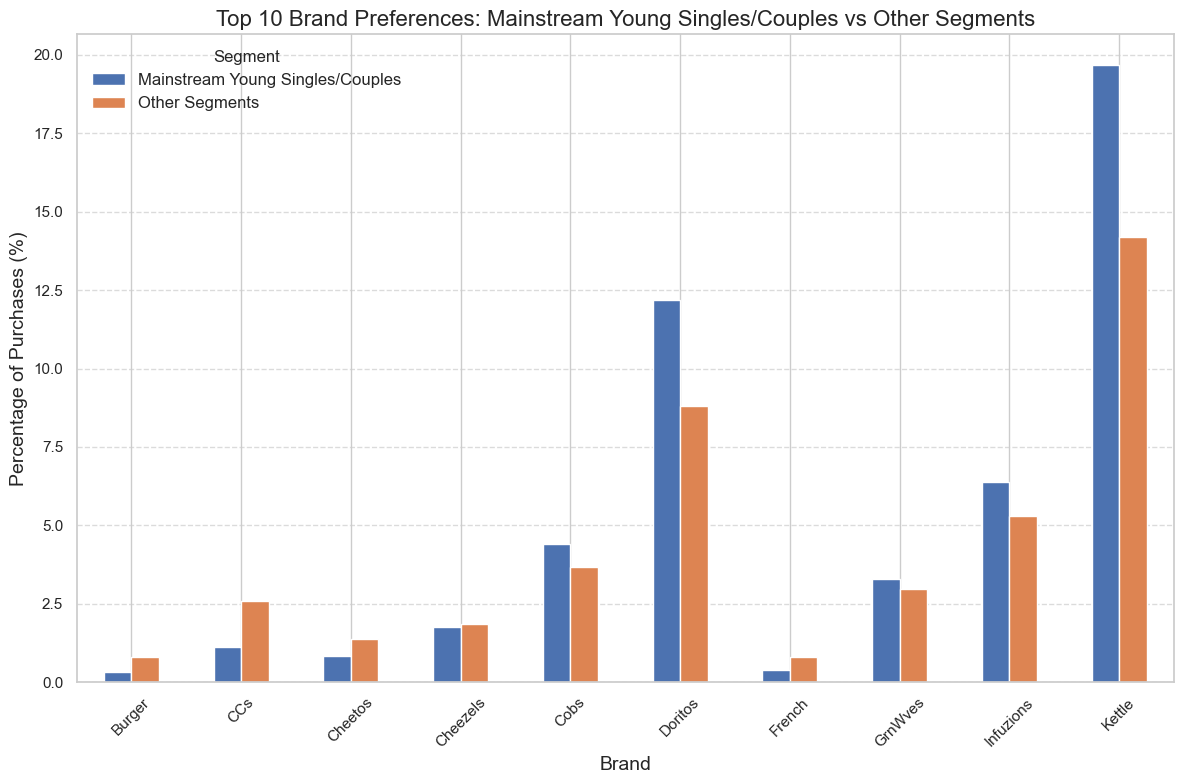

In [44]:

# Plot comparison
brand_comparison.head(10).plot(kind='bar', figsize=(12, 8))
plt.title("Top 10 Brand Preferences: Mainstream Young Singles/Couples vs Other Segments", fontsize=16)
plt.xlabel("Brand", fontsize=14)
plt.ylabel("Percentage of Purchases (%)", fontsize=14)
plt.legend(title="Segment", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Preferred pack size compared to the rest of the population

In [45]:
# Analyze pack size preferences
pack_size_pref_mainstream = mainstream_young['PACK_SIZE'].value_counts(normalize=True) * 100
pack_size_pref_others = other_segments['PACK_SIZE'].value_counts(normalize=True) * 100

# Combine results for comparison
pack_size_comparison = pd.DataFrame({
    'Mainstream Young Singles/Couples': pack_size_pref_mainstream,
    'Other Segments': pack_size_pref_others
}).fillna(0)

# Display the top pack size preferences
print("Pack Size Preference Comparison:")
print(pack_size_comparison.head(10))


Pack Size Preference Comparison:
           Mainstream Young Singles/Couples  Other Segments
PACK_SIZE                                                  
70                                 0.322350        0.824957
90                                 0.654932        1.615251
110                               10.494269        8.152513
125                                0.301883        0.818024
134                               11.845068        9.490468
135                                1.483831        1.123050
150                               15.759312       16.103986
160                                0.654932        1.802426
165                                5.638559        6.759099
170                                8.058739        8.152513


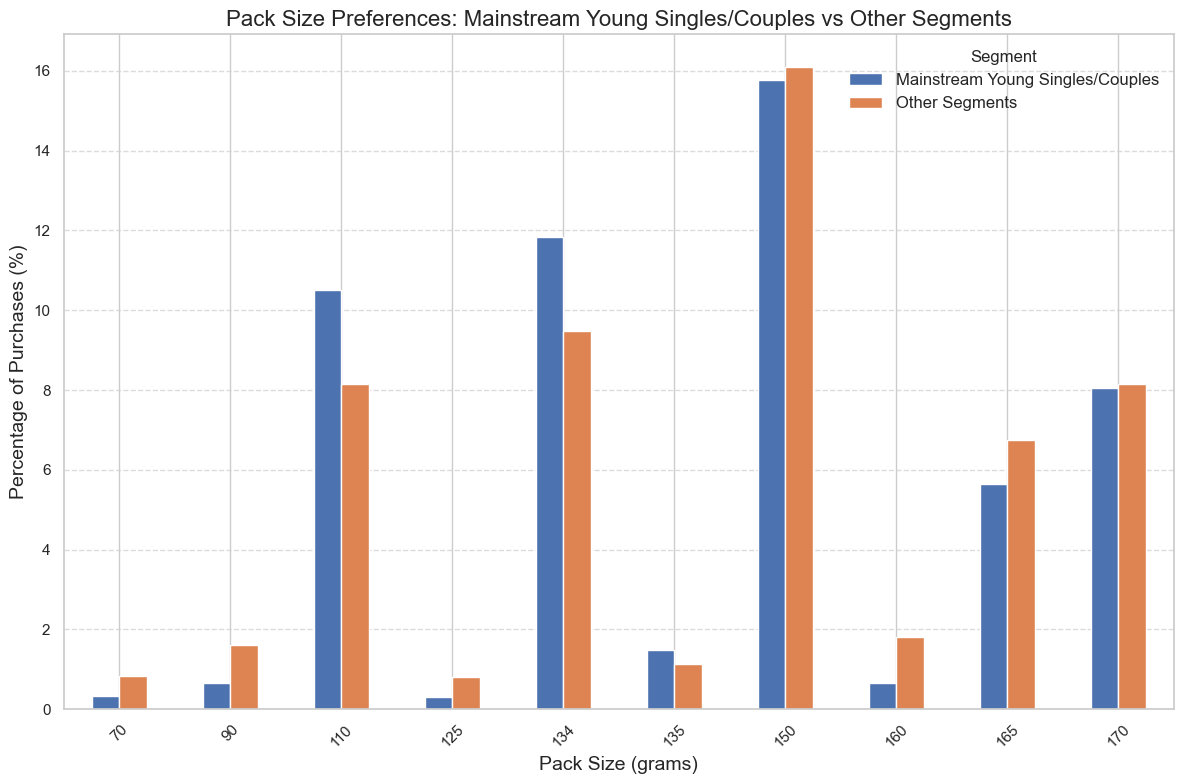

In [46]:
# Plot comparison
pack_size_comparison.head(10).plot(kind='bar', figsize=(12, 8))
plt.title("Pack Size Preferences: Mainstream Young Singles/Couples vs Other Segments", fontsize=16)
plt.xlabel("Pack Size (grams)", fontsize=14)
plt.ylabel("Percentage of Purchases (%)", fontsize=14)
plt.legend(title="Segment", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()